# Video Game Sales
data from more than 16,500 games.

## Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

## Loading Data

In [14]:
videoGameData = pd.read_csv('../input/vgsales.csv', parse_dates=['Year'])

In [15]:
videoGameData.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### About Dataset
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

* Rank - Ranking of overall sales

* Name - The games name

* Platform - Platform of the games release (i.e. PC,PS4, etc.)

* Year - Year of the game's release

* Genre - Genre of the game

* Publisher - Publisher of the game

* NA_Sales - Sales in North America (in millions)

* EU_Sales - Sales in Europe (in millions)

* JP_Sales - Sales in Japan (in millions)

* Other_Sales - Sales in the rest of the world (in millions)

* Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.

In [16]:
videoGameData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16598 non-null  int64         
 1   Name          16598 non-null  object        
 2   Platform      16598 non-null  object        
 3   Year          16327 non-null  datetime64[ns]
 4   Genre         16598 non-null  object        
 5   Publisher     16540 non-null  object        
 6   NA_Sales      16598 non-null  float64       
 7   EU_Sales      16598 non-null  float64       
 8   JP_Sales      16598 non-null  float64       
 9   Other_Sales   16598 non-null  float64       
 10  Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [18]:
videoGameData.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [19]:
videoGameData.describe(include='object')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


<AxesSubplot:xlabel='Global_Sales', ylabel='Density'>

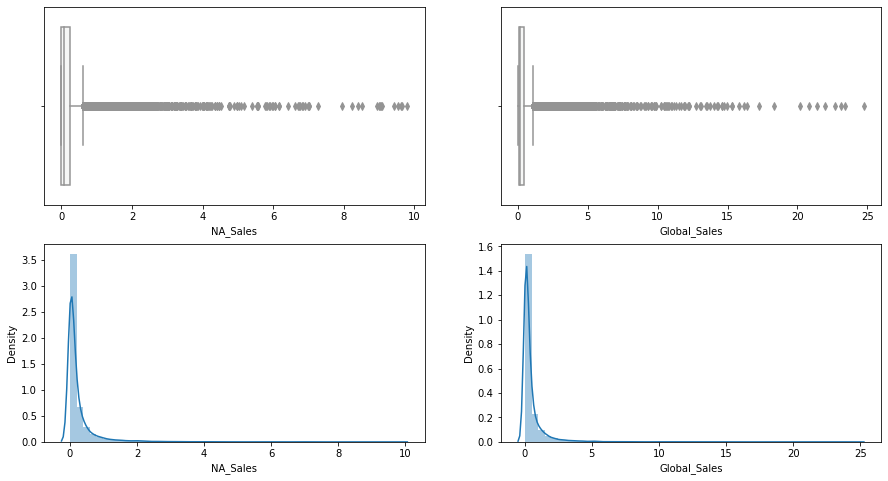

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
sns.boxplot(videoGameData['NA_Sales'][videoGameData['NA_Sales']<10], palette='PRGn', ax = ax[0, 0])
sns.distplot(videoGameData['NA_Sales'][videoGameData['NA_Sales']<10], ax = ax[1, 0])
sns.boxplot(videoGameData['Global_Sales'][videoGameData['NA_Sales']<10], palette='PRGn', ax = ax[0, 1])
sns.distplot(videoGameData['Global_Sales'][videoGameData['NA_Sales']<10], ax = ax[1, 1])

## Data Preprocessing

In [20]:
videoGameData.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [21]:
videoGameData.dropna(inplace=True)

In [22]:
videoGameData['Year'] = videoGameData['Year'].dt.to_period('Y')

### Categorical Data

In [39]:
genreCatDict = {'Action':0,          
            'Sports':1,
            'Misc':2,
            'Role-Playing':3,
            'Shooter': 4,
            'Adventure':5,
            'Racing':6,
            'Platform':7,
            'Simulation':8,
            'Fighting':9,
            'Strategy':10,
            'Puzzle':11   }
videoGameData['Genre_cat'] = videoGameData['Genre'].replace(genreCat).astype('category')

In [44]:
videoGameData['Platform_cat'] = videoGameData['Platform'].astype('category')
videoGameData['Publisher_cat'] = videoGameData['Publisher'].astype('category')

In [45]:
PlatformCatDict = dict( enumerate(videoGameData['Platform_cat'].cat.categories ) )

In [46]:
videoGameData

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_cat,Platform_cat,Publisher_cat
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,Wii,Nintendo
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,7,NES,Nintendo
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,6,Wii,Nintendo
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1,Wii,Nintendo
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,3,GB,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,7,GBA,Kemco
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,4,GC,Infogrames
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,6,PS2,Activision
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,11,DS,7G//AMES


## Data Exploration and Analysis

Text(0, 0.5, 'Count')

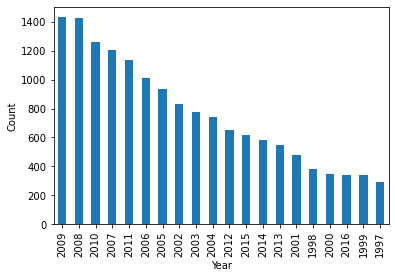

In [29]:
videoGameData['Year'].value_counts()[:20].plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')

Text(0.5, 0, 'Genre')

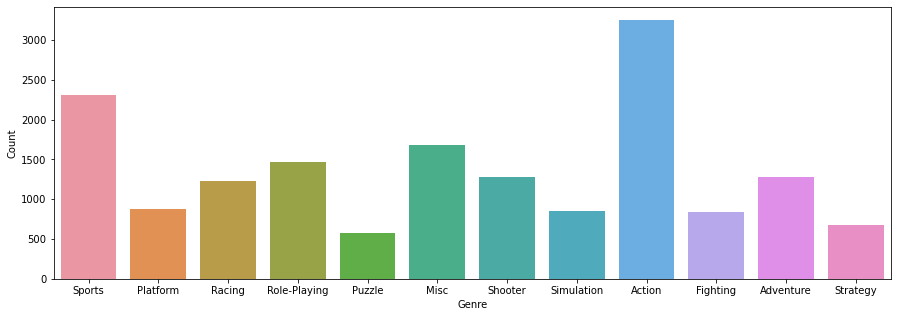

In [30]:
plt.figure(figsize=(15, 5))
sns.countplot(videoGameData['Genre'])
plt.ylabel('Count')
plt.xlabel('Genre')

Text(0.5, 0, 'Platform')

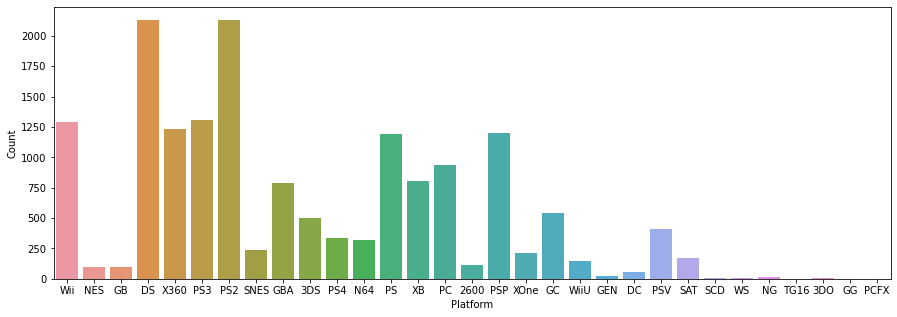

In [31]:
plt.figure(figsize=(15, 5))
sns.countplot(videoGameData['Platform'])
plt.ylabel('Count')
plt.xlabel('Platform')

Text(0, 0.5, 'Global sales')

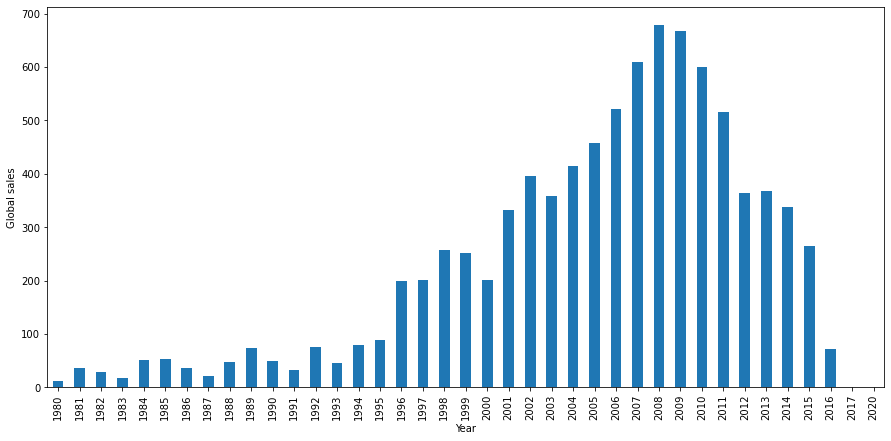

In [32]:
plt.figure(figsize=(15, 7))
videoGameData.groupby(by=['Year'])['Global_Sales'].sum().plot(kind='bar')
plt.ylabel('Global sales')

Text(0, 0.5, 'Global sales')

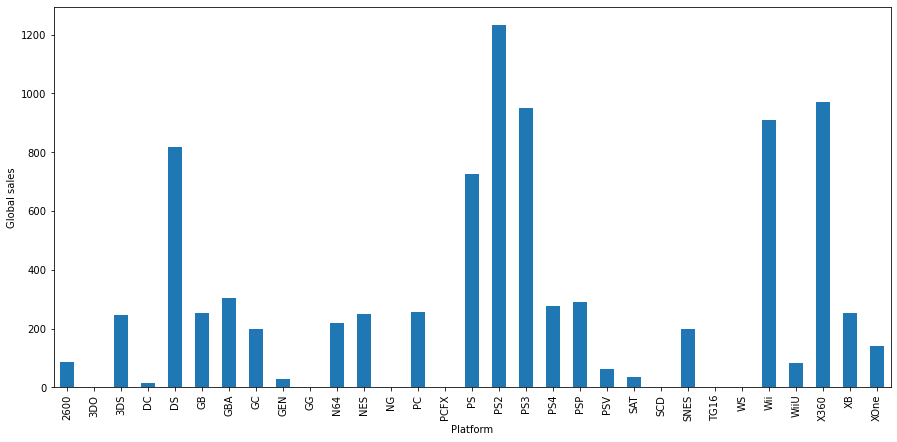

In [33]:
plt.figure(figsize=(15, 7))
videoGameData.groupby(by=['Platform'])['Global_Sales'].sum().plot(kind='bar')
plt.ylabel('Global sales')

Text(0, 0.5, 'Global sales')

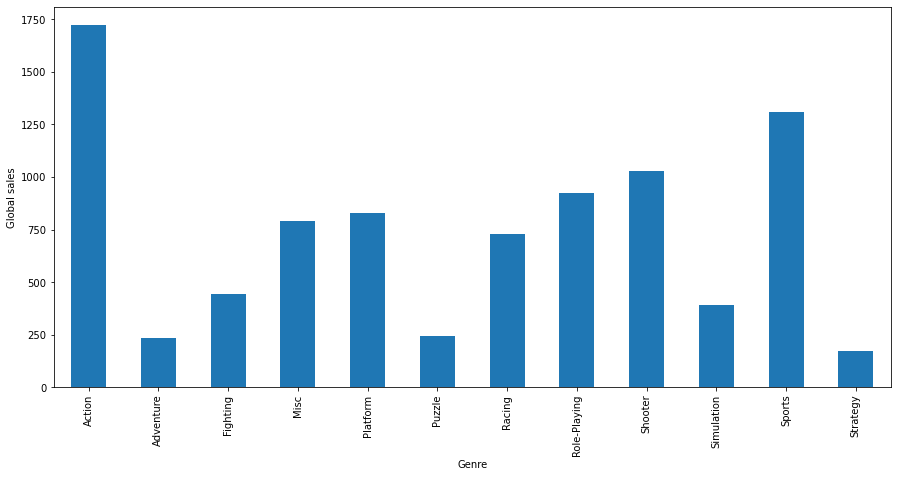

In [34]:
plt.figure(figsize=(15, 7))
videoGameData.groupby(by=['Genre'])['Global_Sales'].sum().plot(kind='bar')
plt.ylabel('Global sales')

<AxesSubplot:>

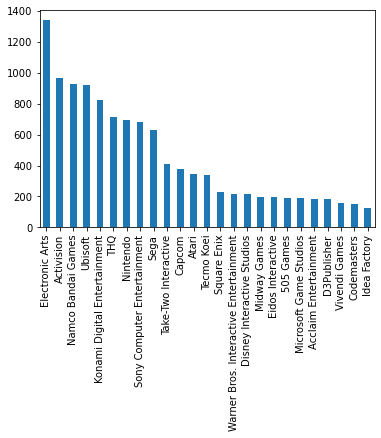

In [35]:
videoGameData['Publisher'].value_counts()[:25].plot(kind='bar')

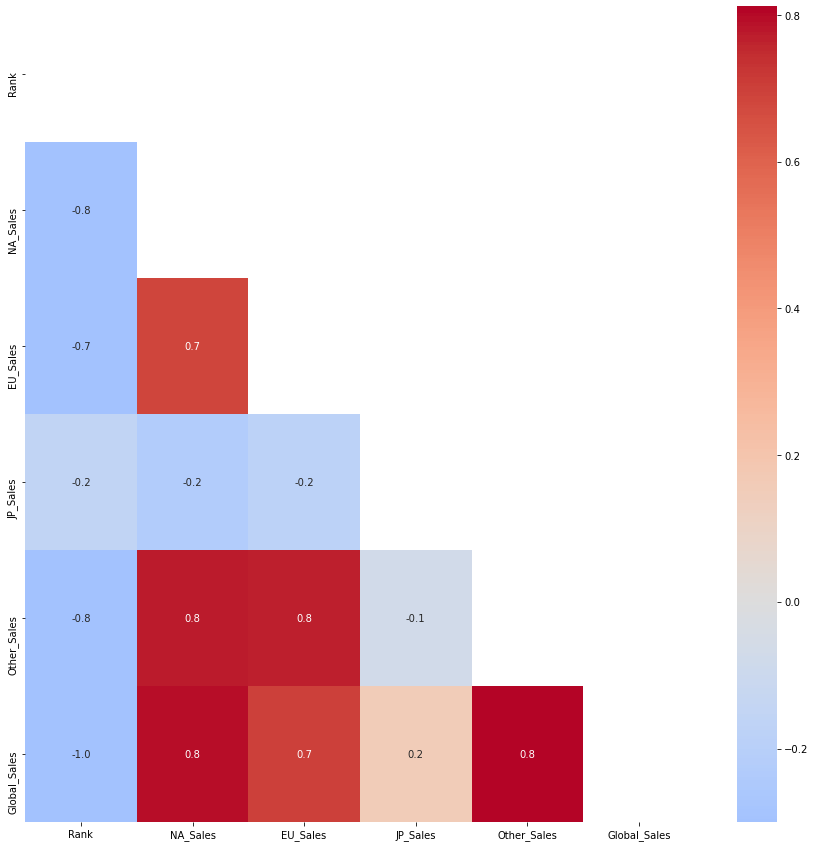

In [43]:
matrix = np.triu(videoGameData.corr(method='spearman'))

plt.figure(figsize=(15, 15))

sns.heatmap(videoGameData.corr(method='spearman'), annot=True,
            fmt='.1f', vmin=-0.3, center=0, cmap='coolwarm', mask=matrix);

